In [1]:
def get_unique_values(keys, target_key, datatype = float):
    unique_c_values = set()  

    for key in keys:
        if not (target_key + "=") in key:
            continue
        key_value_pairs = key.split(", ")
        for pair in key_value_pairs:
            k, v = pair.split("=") 
            if k == target_key:
                unique_c_values.add(datatype(v))

    unique_c_values_list = sorted(list(unique_c_values))

    return unique_c_values_list

def get_param_value(filename, target_key, value_type = float):
    unique_c_values = set()

    l = filename.split("_")
    
    tmp = l[l.index(target_key) + 1]
    if ".json" in tmp:
        val = value_type(tmp[:-5])
    else:
        val = value_type(tmp)

    return val

In [2]:
import json, glob
gate_type = "haar"
error_type = "depol"

n_data = 2000
eps = 1e-4
load_each_J = True
load_each_c = True

assert load_each_J and load_each_c, "both required here"

sname = f"../results/success_rate/success_rate_{gate_type}_{error_type}_ndata_*_eps_{eps:.2e}*.json"
fname_list = glob.glob(sname)
ndata_candidates = [get_param_value(_f, "ndata", int) for _f in fname_list]
print("\ncandidates for ndata:")
print(sorted(set(list(ndata_candidates))))
print(f"your choice: {n_data}")

sname = f"../results/success_rate/success_rate_{gate_type}_{error_type}_ndata_{n_data}_cfilled_eps_{eps:.2e}_J_*.json"
fname_list = [f for f in glob.glob(sname) if "_c_" in f]
c_list = sorted(list(set([get_param_value(_f, "c", float) for _f in fname_list])))
print(f"{c_list=}")
data = {}
for c in c_list:
    files = [f for f in glob.glob(sname) if f"_c_{c}" in f and f"_J_" in f]
    J_list = [get_param_value(_f, "J", int) for _f in files]
    for J, filename in zip(J_list, files):
        key = f"c={c}, {J=}"
        data[key] = json.load(open(filename, "r"))
    
        nondiag_l1_data = data[key]["nondiag_l1_data"]


candidates for ndata:
[50, 2000, 10000]
your choice: 2000
c_list=[0.3, 0.6, 0.9, 1.2, 1.5]


/var/folders/xw/hgtg8nx922g7smt8_4th3hxc0000gn/T/ipykernel_80147/2956826575.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("Reds")


([<matplotlib.axis.XTick at 0x11f63e5b0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7')])

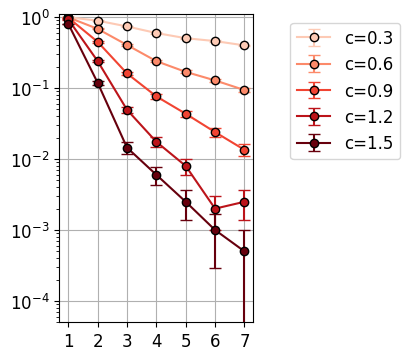

In [3]:
import numpy as np
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["font.size"] = 12
cmap = get_cmap("Reds")
fig = plt.figure(figsize = (2.5, 4))

eps = 1e-4
threshold = 1e-12
J_list_disp = [1, 2, 3, 4, 5, 6, 7,]

c_list = [0.3, 0.6, 0.9, 1.2, 1.5]
ymin = 1
for jj, c in enumerate(c_list):
    color = cmap(((jj+1)/len(c_list)))
    success = []
    success_std = []
    
    for ii, J in enumerate(J_list_disp):
        mykey = f"c={c}, {J=}"
        key = f"eps={eps:.2e}, {J=}, c={c}"
    
        try:
            nondiag_l1_data = data[mykey]["nondiag_l1_data"][key]
            arr = np.array(nondiag_l1_data) <= min([threshold, eps**2 * c])
            rate = np.mean(arr)
            std = np.std(arr) / np.sqrt(len(arr)-1)

            success.append(rate)
            success_std.append(std)     
        except Exception as e:
            print(e)
            success.append(np.NaN)
            success_std.append(np.NaN)     
        
        
    if ymin > 1 - max(success):
        ymin = 1 - max(success)

    plt.errorbar(J_list_disp, 1- np.array(success),yerr = success_std,  label = f"{c=}", color = color, capsize = 4, marker = "o", markeredgecolor = "black")
plt.yscale("log")
plt.grid()
plt.legend(bbox_to_anchor=(1.8, 1))
plt.ylim(ymin = 0.05e-3, ymax = 1.1)
plt.xticks(J_list_disp, J_list_disp)